In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

sns.set_theme(style="whitegrid")
print("Environment prepared.")

Environment prepared.


In [ ]:
ca_raw_data = fetch_california_housing()
ca_df = pd.DataFrame(ca_raw_data.data, columns=ca_raw_data.feature_names)
ca_df['House_Price'] = ca_raw_data.target

print(f"Dataset contains {ca_df.shape[0]} rows and {ca_df.shape[1]} columns.")

Dataset contains 20640 rows and 9 columns.


In [ ]:
print("California Housing Data Preview:")
display(ca_df.head())

print("\nColumn Data Types:")
print(ca_df.dtypes)

California Housing Data Preview:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Column Data Types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
House_Price    float64
dtype: object


In [ ]:
ca_description = ca_df.describe()
print("Statistical Summary for California Housing:")
display(ca_description)

Statistical Summary for California Housing:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
ca_null_count = ca_df.isnull().sum()
print("Null Values Check:")
print(ca_null_count)

Null Values Check:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
House_Price    0
dtype: int64


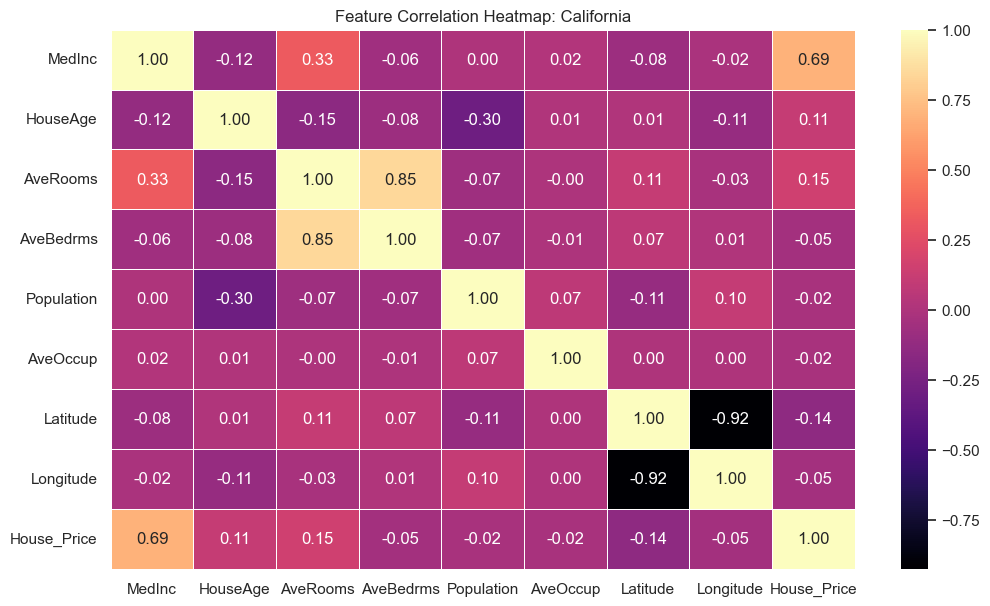

In [ ]:
ca_corr_matrix = ca_df.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(ca_corr_matrix, annot=True, fmt=".2f", cmap="magma", linewidths=0.5)
plt.title("Feature Correlation Heatmap: California")
plt.show()

In [ ]:
ca_X = ca_df.drop(columns="House_Price")
ca_y = ca_df["House_Price"]

print("Features (ca_X) and Target (ca_y) successfully separated.")

Features (ca_X) and Target (ca_y) successfully separated.


In [ ]:
from sklearn.model_selection import train_test_split


ca_X_train, ca_X_test, ca_y_train, ca_y_test = train_test_split(
    ca_X, ca_y, test_size=0.2, random_state=12
)

print(f"Training set size: {ca_X_train.shape[0]}")
print(f"Testing set size: {ca_X_test.shape[0]}")

Training set size: 16512
Testing set size: 4128


In [ ]:
from sklearn.preprocessing import StandardScaler


ca_scaler = StandardScaler()


ca_X_train_scaled = ca_scaler.fit_transform(ca_X_train)


ca_X_test_scaled = ca_scaler.transform(ca_X_test)

print("Scaling applied to California training and testing sets.")

Scaling applied to California training and testing sets.


In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

class ModelTrainer:
    def __init__(self, model_type="linear", tune=False):
        self.model_type = model_type
        self.tune = tune
        self.model = None

    def _get_model(self):
        if self.model_type == "linear":
            return LinearRegression()
        elif self.model_type == "ridge":
            return Ridge()
        elif self.model_type == "lasso":
            return Lasso()
        else:
            raise ValueError("Invalid model type")

    def train(self, X_train, y_train):
        base_model = self._get_model()
        if self.tune and self.model_type != "linear":
            param_grid = {"alpha": [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 0.1, 1.0, 10.0]}
            grid = GridSearchCV(base_model, param_grid, cv=5, scoring="r2")
            grid.fit(X_train, y_train)
            self.model = grid.best_estimator_
            print(f"Optimal parameters for {self.model_type}: {grid.best_params_}")
        else:
            self.model = base_model
            self.model.fit(X_train, y_train)
        return self.model

class ModelTester:
    def __init__(self, model):
        self.model = model

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        return {
            "R2": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
        }

In [ ]:
model_types = ["linear", "ridge", "lasso"]
trained_models = {}



for m_type in model_types:

    is_tuned = True if m_type != "linear" else False
    
    trainer = ModelTrainer(model_type=m_type, tune=is_tuned)
    trained_models[m_type] = trainer.train(ca_X_train_scaled, ca_y_train)
    
    print(f"Successfully trained {m_type.upper()} model.")

Successfully trained LINEAR model.
Optimal parameters for ridge: {'alpha': 10.0}
Successfully trained RIDGE model.
Optimal parameters for lasso: {'alpha': 0.001}
Successfully trained LASSO model.


In [ ]:
comparison_metrics = {}

for name, model_obj in trained_models.items():
    tester = ModelTester(model_obj)
    metrics = tester.evaluate(ca_X_test_scaled, ca_y_test)
    comparison_metrics[name] = metrics


df_results = pd.DataFrame(comparison_metrics).T
print("--- Performance Comparison ---")
display(df_results)

--- Performance Comparison ---


,R2,MSE,RMSE
linear,0.615664,0.526993,0.725943
ridge,0.615628,0.527042,0.725977
lasso,0.615357,0.527412,0.726232


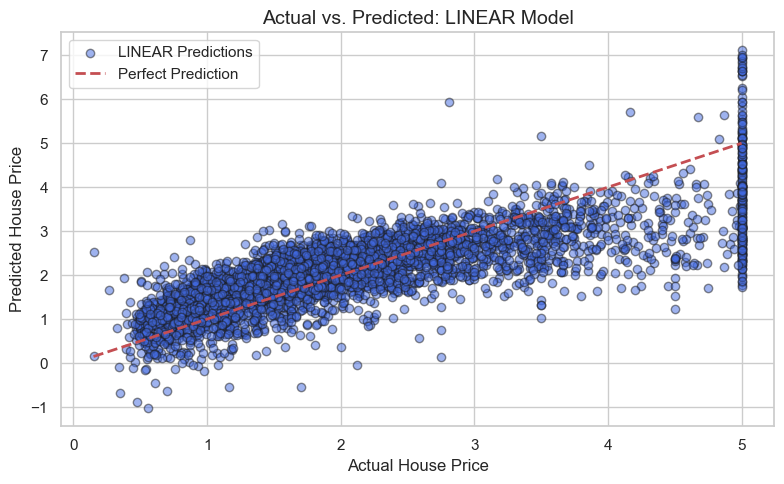

Finished generating plot for LINEAR model.
------------------------------


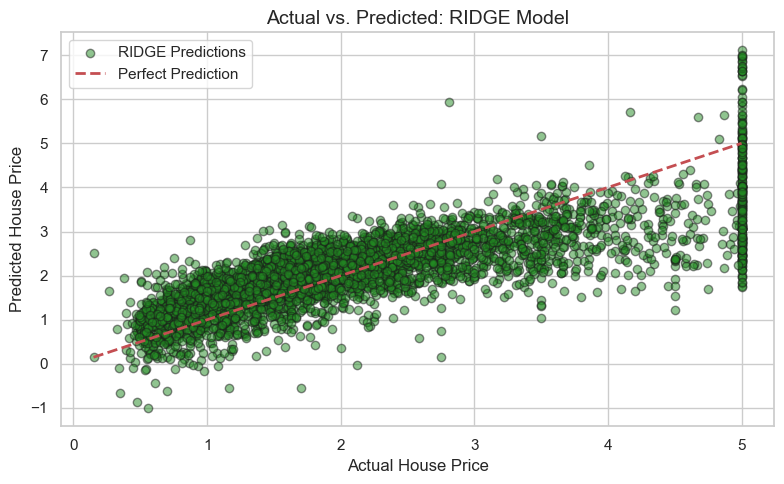

Finished generating plot for RIDGE model.
------------------------------


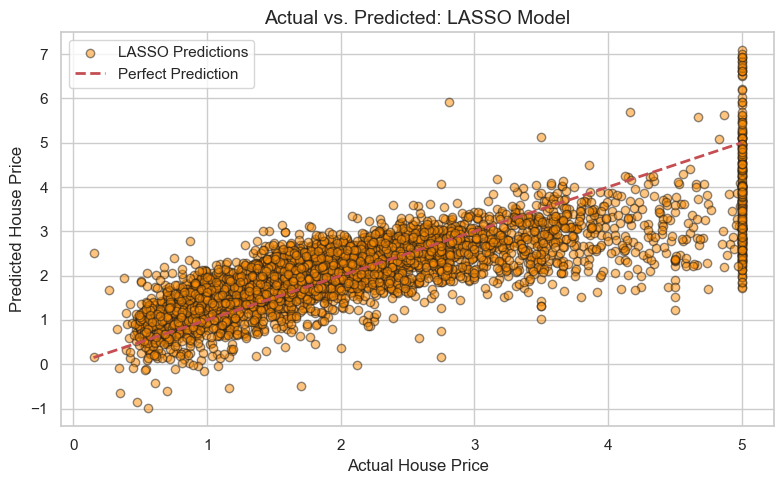

Finished generating plot for LASSO model.
------------------------------


In [ ]:
sns.set_style("whitegrid")
model_names = ["linear", "ridge", "lasso"]
colors = ['royalblue', 'forestgreen', 'darkorange']


for i, name in enumerate(model_names):
    plt.figure(figsize=(8, 5))
    

    current_model = trained_models[name]
    y_pred_current = current_model.predict(ca_X_test_scaled)

    plt.scatter(ca_y_test, y_pred_current, alpha=0.5, color=colors[i], edgecolors='k', label=f'{name.upper()} Predictions')

    line_coords = [ca_y_test.min(), ca_y_test.max()]
    plt.plot(line_coords, line_coords, 'r--', lw=2, label='Perfect Prediction')
    

    plt.title(f'Actual vs. Predicted: {name.upper()} Model', fontsize=14)
    plt.xlabel('Actual House Price', fontsize=12)
    plt.ylabel('Predicted House Price', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


    print(f"Finished generating plot for {name.upper()} model.")
    print("-" * 30)